In [1]:
!pip install opencv-python
!pip install git+https://github.com/openai/CLIP.git


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-u4dy4zdq
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-u4dy4zdq
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=a955fdcf142d29b6eaf855a258504880272a9dc47a9bfd350c7d28819cc62ca5
  Stored in directory: /tmp/pip-ephem-wheel-cache-87wrnd6w/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [7]:
import cv2
import torch
import clip
from PIL import Image
img_path="aileader.png"
img_cv=cv2.imread(img_path)
img_rgb=cv2.cvtColor(img_cv,cv2.COLOR_BGR2RGB)
img_pil=Image.fromarray(img_rgb)
from google.colab.patches import cv2_imshow  # Import the correct function


In [4]:
# Load the CLIP model and preprocess
model, preprocess = clip.load("ViT-B/32", device="cpu")

# Preprocess the image as required by CLIP
image_input = preprocess(img_pil).unsqueeze(0)


100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 53.6MiB/s]


In [5]:
text_inpput=clip.tokenize(["a dog", "a cat", "a car", "a house", "a person"])
with torch.no_grad():
  text_features=model.encode_text(text_inpput)
  image_features=model.encode_image(image_input)
similarity =(image_features @ text_features.T).softmax(dim=-1)

best_match = similarity.argmax().item()
print(f"Best match: {['a dog', 'a cat', 'a car', 'a house', 'a person'][best_match]}")


Best match: a person


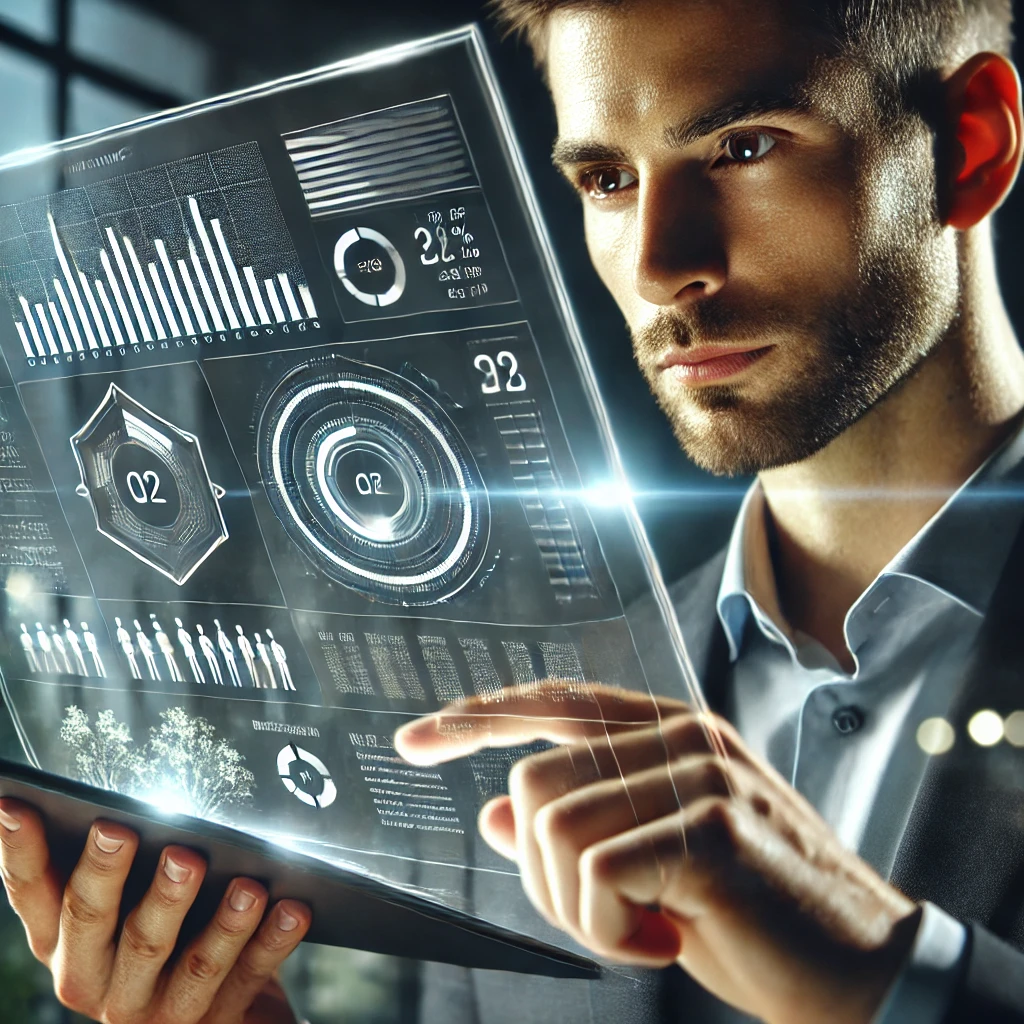

In [8]:
cv2_imshow(img_cv)